In [1]:
# NYSE：New York Stock Exchange 纽约证券交易所
# 二十支股票：
# GOOG谷歌,TSLA特斯拉,AAPL苹果,AMZN亚马逊,MSFT微软,NVDA英伟达,INTC英特尔,QCOM高通,WDC西部数据,AMD超威,ORCL甲骨文,SAP思爱普,CSCO思科,BABA阿里巴巴,NOK诺基亚,T美国电话电报公司,VZ微讯,FB脸书,TWTR推特,SNAP色拉布

In [2]:
import numpy as np                               # 向量和矩阵
import pandas as pd                              # 表格和数据处理
import matplotlib.pyplot as plt                  # 绘图
import seaborn as sns                            # 更多绘图功能

from dateutil.relativedelta import relativedelta # 处理不同格式的时间日期
from scipy.optimize import minimize              # 最小化函数

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # 一些有用的函数
from tqdm import tqdm_notebook

from datetime import date                        # 日期函数

import warnings                                  # 勿扰模式
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
from pandas_datareader import data, wb
# 所研究的二十支股票的NYSE代码
tickers = ['GOOG','TSLA','AAPL','AMZN','MSFT','NVDA','INTC','QCOM','WDC','AMD','ORCL','SAP','CSCO','BABA',
           'NOK','T','VZ','FB','TWTR','SNAP']

# We would like five-years available data from 28/10/2013 until 10/28/2018.
start_date = '2018-5-28'
end_date = '2018-10-28'
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# panel_data = data.DataReader('AAPL', 'iex', start_date, end_date)
panel_data = data.DataReader(tickers, "iex", start_date, end_date)
# print(panel_data['close']) #半年的收盘值
panel_close_data = panel_data['close']
# print(panel_close_data)

In [4]:
#时序数据上的线性模型
# stock = pd.read_csv('/Users/BartSu/Desktop/AAPL-Close.csv', index_col=['Date'], parse_dates=['Date'])
data = pd.DataFrame(panel_close_data['AAPL'].copy().astype(float))
data.columns = ["y"]

df = pd.DataFrame({'y':[0,0,0,0,0]},
                   index = [str(date(2018, 10, 29)),str(date(2018, 10, 30)),str(date(2018, 10, 31)),
                            str(date(2018, 11, 1)),str(date(2018, 10, 2))])

data = data.append(df)
# print(dir(data.index))
# print(data)

[221.55743126 222.74577762 220.05061329 217.78890743 217.26121324]


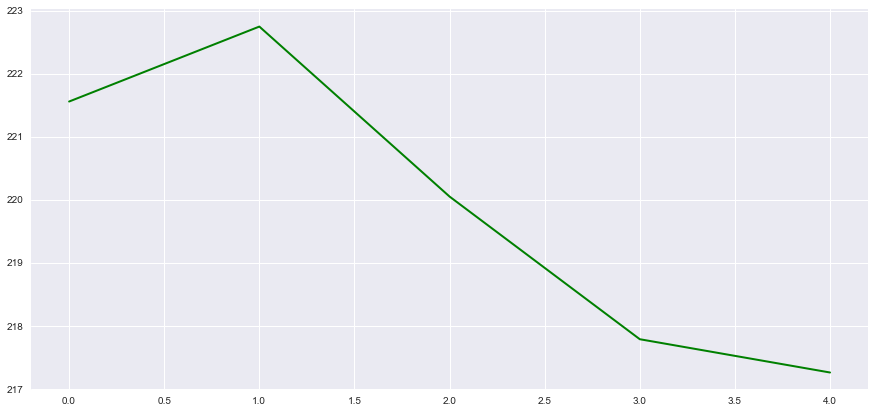

In [6]:
#时序数据上的线性模型
data = pd.DataFrame(panel_close_data['AAPL'].copy().astype(float))
data.columns = ["y"]

df = pd.DataFrame({'y':[0,0,0,0,0]},
                   index = [str(date(2018, 10, 29)),str(date(2018, 10, 30)),str(date(2018, 10, 31)),
                            str(date(2018, 11, 1)),str(date(2018, 10, 2))])
data = data.append(df)

for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

y = data.dropna().y # 删除n/a的数据
X = data.dropna().drop(['y'], axis=1)

# 除去需要预测的5天
train_index = int(len(X)) - 5
X_train = X.iloc[:train_index]
y_train = y.iloc[:train_index]

# 机器学习
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X.tail(5))
print(prediction)
# plt.figure(figsize=(15, 7))
# plt.plot(prediction, "g", label="prediction", linewidth=2.0)
